Original Image, size:  (5984, 4840, 3)


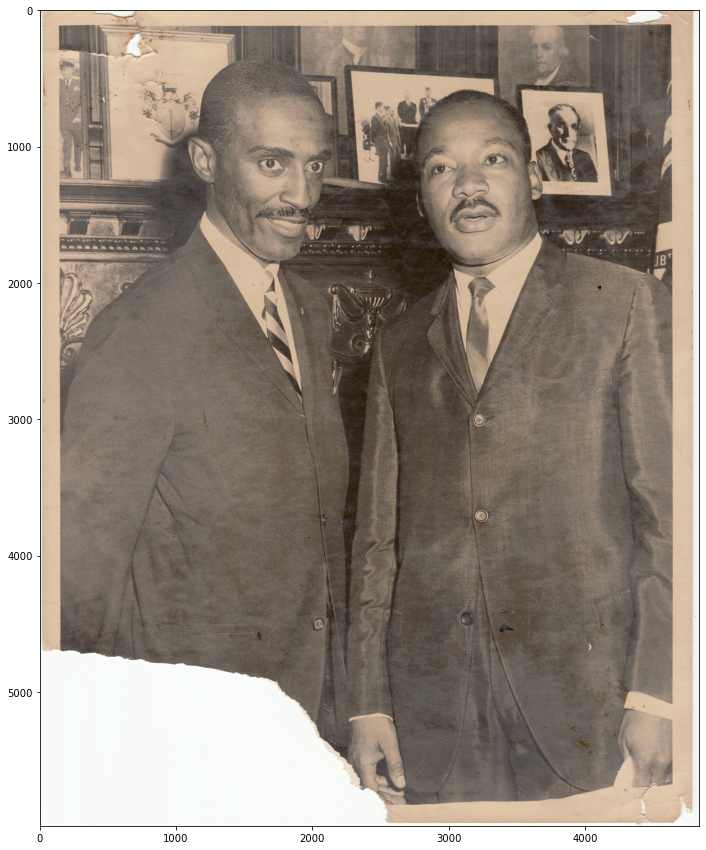

Detector Model Used:  opencv
Face Detection Confidence score:  1.805802276241593
Face Detection Confidence score:  4.043026118713897
Face Detection Confidence score:  8.001350036531221
Face Detection Confidence score:  6.869442983705085
Face Detection Confidence score:  2.0877270571654662
Face Detection Confidence score:  2.016805074585136
Model Run Time:  3.35  seconds


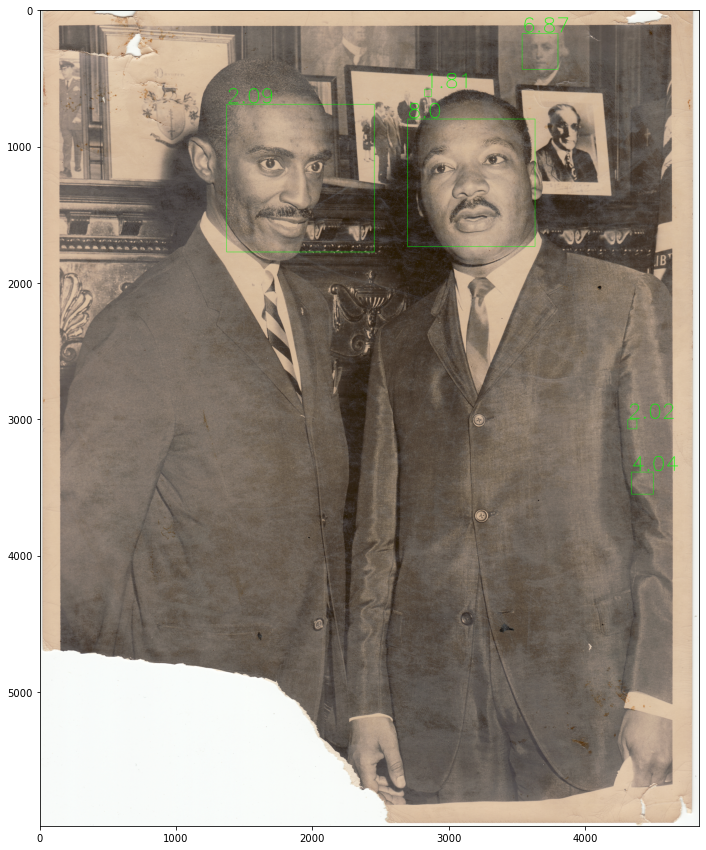

Detector Model Used:  ssd
Face Detection Confidence score:  0.9956833124160767
Face Detection Confidence score:  0.9911942481994629
Model Run Time:  0.91  seconds


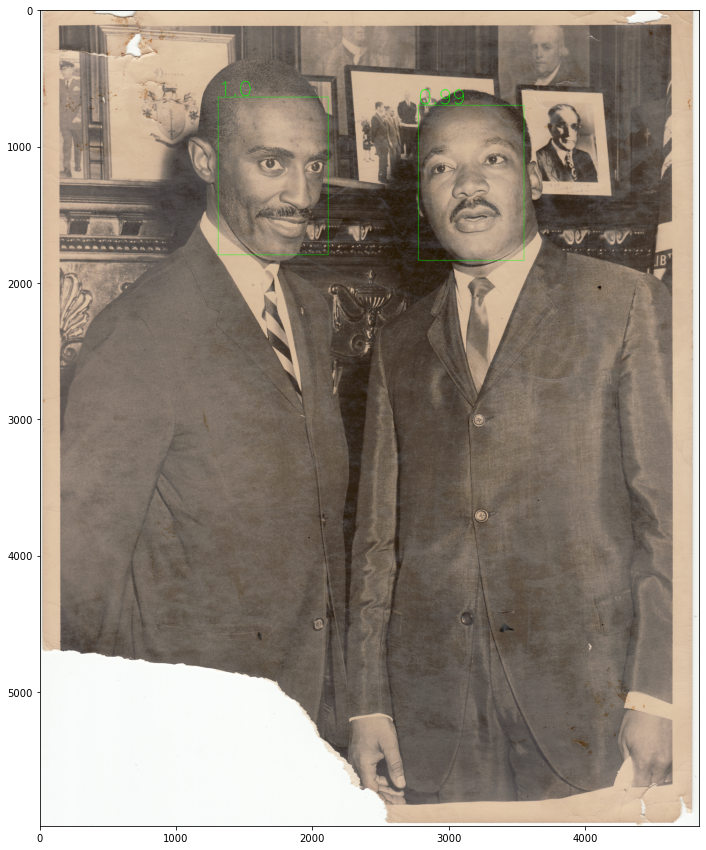

Detector Model Used:  mtcnn
3/3 [==============================] - 0s 13ms/step
Face Detection Confidence score:  0.9988435506820679
Face Detection Confidence score:  0.9982080459594727
Face Detection Confidence score:  0.9918100237846375
Face Detection Confidence score:  0.965094268321991
Model Run Time:  8.46  seconds


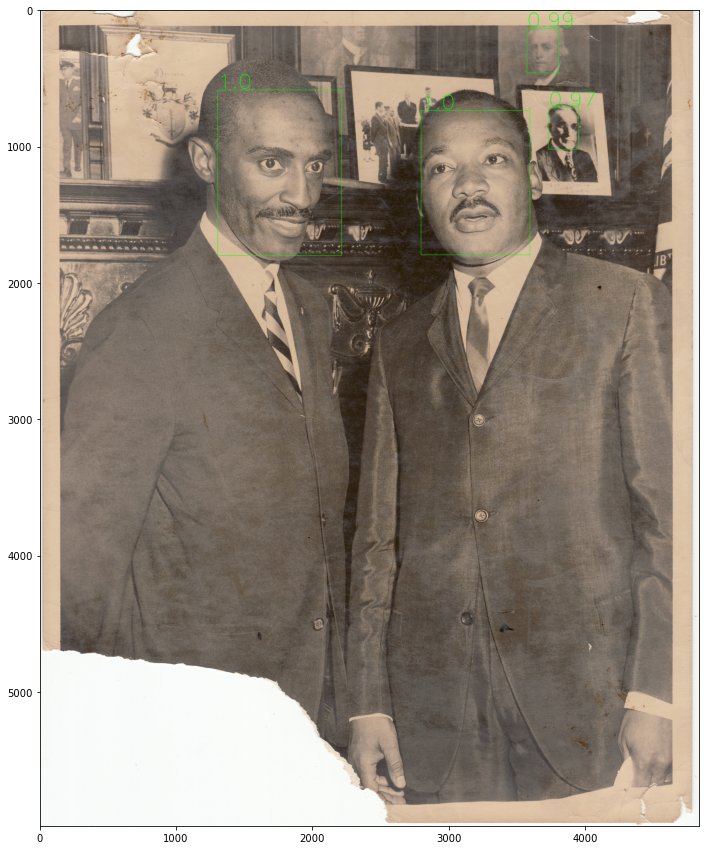

In [6]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt
import time
import numpy as np

img_path = './TestImages/neu_m039md26w-master.jpg'
#img_path = './TestImages/neu_129523-highres.jpg'
#img_path = './TestImages/neu_129528-highres.jpg'
#turn the image into a vector
image = cv2.imread(img_path)
print('Original Image, size: ',image.shape)

#show the original image
plt.figure(figsize=(15,15))
plt.imshow(image[:,:,::-1]) #reads in reverse RGB for some reason, so need to reverse it
plt.show()

detectors = ['opencv','ssd','mtcnn']

for detector in detectors:
    print('Detector Model Used: ',detector)
    #for timing detection
    tic = time.time()
    img = DeepFace.extract_faces(img_path=img_path,detector_backend = detector,enforce_detection=False)
    #img is a list of dictionaries, each item corresponds to a detected face
    toc = time.time()
    #copy image so we can draw boxes on it
    imgwithbox=image.copy()
    #loop through the detected faces
    for i in img:
        f_a = i['facial_area']
        #draw a box, use the bottom left x,y and top right x,y coordinates, tuple for color, and last parameter is box line thickness
        imgwithbox=cv2.rectangle(imgwithbox,(f_a['x'],f_a['y']),(f_a['x']+f_a['w'],f_a['y']+f_a['h']),(0,255,0),2)
        #add confidence score text to box
        cv2.putText(imgwithbox, str(round(i['confidence'],2)), (f_a['x'], f_a['y']-10), cv2.FONT_HERSHEY_SIMPLEX, 5, (0,255,0), 4)
        print('Face Detection Confidence score: ',i['confidence'])
    print('Model Run Time: ',round(toc-tic,2),' seconds')
    #show the image with the detected faces
    plt.figure(figsize=(15,15))
    plt.imshow(imgwithbox[:,:,::-1])
    plt.show()